In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height) # x now is already standardized
y, tx = build_model_data(x, weight) # tx (2nd col.) now is already standardized

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [4]:
def compute_loss(y, tx, w):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    mse = np.square((y - tx @ w)).mean()
    return mse

# 2. Grid Search

Fill in the function `grid_search()` below:

In [5]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """
    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            w = np.array([w0, w1])
            mse = compute_loss(y, tx, w)
            losses[i, j] = mse
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356496, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.011 seconds


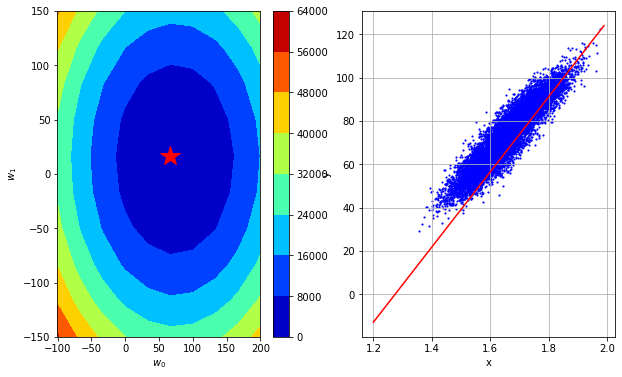

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
# fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [9]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    grad = - 1/ len(y) * (tx.T @ (y - tx @ w))
    return grad


Please fill in the functions `gradient_descent` below:

In [10]:
compute_gradient(y, tx, np.array([50,10]))

array([-23.293922  ,  -3.47971243])

In [11]:
compute_gradient(y, tx, np.array([73,13]))

array([-0.293922  , -0.47971243])

In [12]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_gradient(y, tx, w)
        w = w - gamma * grad
        loss = compute_loss(y, tx, w)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [13]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7 # 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=530.6049242179212, w0=51.30574540147361, w1=9.435798704492278
GD iter. 1/49: loss=75.75675910088253, w0=66.69746902191571, w1=12.266538315840002
GD iter. 2/49: loss=34.82042424034894, w0=71.31498610804834, w1=13.11576019924433
GD iter. 3/49: loss=31.136154102900914, w0=72.70024123388814, w1=13.37052676426563
GD iter. 4/49: loss=30.80456979053059, w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/49: loss=30.77472720241726, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=30.77204136948706, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=30.771799644523348, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=30.77177788927661, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=30.7717759313044, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=30.771775755086907, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=30.771775739227333, w0=73.29388305071, w1=13.479705271317192
GD iter

In [14]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [24]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    grad = - 1/ len(y) * (tx.T @ (y - tx @ w))
    return grad


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size=batch_size, num_batches=10, shuffle=True): # from from helpers import batch_iter
            grad = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            w = w - gamma * grad
        loss = compute_loss(y, tx, w)
        ws.append(w)
        losses.append(loss)

        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [25]:
from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 32 # 单个数据点

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(        # batch_iter(num_batch=1)默认，batch数量越多，loss收敛越快；batchsize越大，loss收敛越快
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=684.8945992184008, w0=47.99306231447285, w1=9.73948215498182
SGD iter. 1/49: loss=111.95220800238909, w0=64.53896790434297, w1=11.351048297364983
SGD iter. 2/49: loss=39.847258894148446, w0=70.29421387492269, w1=13.201801823092145
SGD iter. 3/49: loss=31.833075975405297, w0=72.2665094271654, w1=13.555367167835689
SGD iter. 4/49: loss=30.96780167576805, w0=72.87644569898181, w1=13.627155557716732
SGD iter. 5/49: loss=30.831910334391008, w0=73.45914546825635, w1=13.660918955195147
SGD iter. 6/49: loss=30.88745146373989, w0=73.34650342915033, w1=13.143690233920445
SGD iter. 7/49: loss=30.79422918930141, w0=73.20866882903918, w1=13.602941279521437
SGD iter. 8/49: loss=30.898598637966717, w0=73.42680434012962, w1=13.810113985453148
SGD iter. 9/49: loss=30.85238865409105, w0=73.33677744148257, w1=13.760383644321289
SGD iter. 10/49: loss=30.86111669001964, w0=73.47654288514953, w1=13.716335691320603
SGD iter. 11/49: loss=30.785842326887185, w0=73.19088098817834, w1=13.538

In [26]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [27]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [28]:
y.shape, tx.shape

((202,), (202, 2))

In [29]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()


# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

# compare with when no outliers exist (see below): w0=73.61616908174418, w1=14.472539039780616

GD iter. 0/49: loss=636.56424940319, w0=51.847464098448484, w1=7.724426406192441
GD iter. 1/49: loss=177.2847112330252, w0=67.401703327983, w1=10.041754328050121
GD iter. 2/49: loss=135.94955279771042, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/49: loss=132.22938853853208, w0=73.46785662750146, w1=10.945512217574594
GD iter. 4/49: loss=131.89457375520604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=131.8644404247067, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=131.86172842496174, w0=74.05160722578589, w1=11.03248153448191
GD iter. 7/49: loss=131.86148434498472, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=131.86146237778675, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=131.86146040073896, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=131.86146022280465, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=131.86146020679058, w0=74.06776649225756, w1=11.034889001593537

In [30]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [31]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [32]:
y.shape, tx.shape

((200,), (200, 2))

In [33]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()


# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=534.100051755883, w0=51.54259072181183, w1=10.132993413506075
GD iter. 1/49: loss=72.90005601500053, w0=67.00536793835533, w1=13.172891437557823
GD iter. 2/49: loss=31.39205639832127, w0=71.64420110331838, w1=14.084860844773322
GD iter. 3/49: loss=27.656336432820154, w0=73.03585105280729, w1=14.358451666937965
GD iter. 4/49: loss=27.320121635925045, w0=73.45334603765397, w1=14.440528913587356
GD iter. 5/49: loss=27.289862304204483, w0=73.57859453310797, w1=14.46515208758217
GD iter. 6/49: loss=27.287138964349634, w0=73.61616908174418, w1=14.472539039780616
GD iter. 7/49: loss=27.286893863762707, w0=73.62744144633503, w1=14.474755125440149
GD iter. 8/49: loss=27.286871804709882, w0=73.63082315571229, w1=14.47541995113801
GD iter. 9/49: loss=27.28686981939512, w0=73.63183766852546, w1=14.475619398847368
GD iter. 10/49: loss=27.286869640716795, w0=73.63214202236942, w1=14.475679233160175
GD iter. 11/49: loss=27.286869624635752, w0=73.6322333285226, w1=14.47569718345401

In [34]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [38]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """

    sclar = np.where((y - tx @ w) >= 0, -1, 1) # (N, )
    grad = 1/ len(y) * (sclar @ tx).reshape(-1)
    return grad


In [39]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_subgradient_mae(y, tx, w)
        w = w - gamma * grad
        loss = compute_loss(y, tx, w, method="MAE")
  
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [44]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height) # x now is already standardized
y, tx = build_model_data(x, weight) # tx (2nd col.) now is already standardized

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

# w0=72.62673267326743, w1=15.97128076969684，loss=5.31^2 与之前loss=131.8614（MSE）相比要好，说明MAE不易受outlier影响

SubGD iter. 0/499: loss=73.36780585492637, w0=0.7, w1=8.756471895211877e-16
SubGD iter. 1/499: loss=72.66780585492637, w0=1.4, w1=1.7512943790423754e-15
SubGD iter. 2/499: loss=71.96780585492637, w0=2.0999999999999996, w1=2.626941568563563e-15
SubGD iter. 3/499: loss=71.26780585492638, w0=2.8, w1=3.502588758084751e-15
SubGD iter. 4/499: loss=70.56780585492638, w0=3.5, w1=4.378235947605939e-15
SubGD iter. 5/499: loss=69.86780585492637, w0=4.2, w1=5.253883137127127e-15
SubGD iter. 6/499: loss=69.16780585492639, w0=4.9, w1=6.1295303266483146e-15
SubGD iter. 7/499: loss=68.46780585492638, w0=5.6000000000000005, w1=7.0051775161695025e-15
SubGD iter. 8/499: loss=67.76780585492638, w0=6.300000000000001, w1=7.88082470569069e-15
SubGD iter. 9/499: loss=67.06780585492638, w0=7.000000000000001, w1=8.756471895211878e-15
SubGD iter. 10/499: loss=66.36780585492637, w0=7.700000000000001, w1=9.632119084733065e-15
SubGD iter. 11/499: loss=65.66780585492639, w0=8.4, w1=1.0507766274254253e-14
SubGD iter.

In [45]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [49]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size=batch_size, num_batches=10, shuffle=True): # from from helpers import batch_iter
            grad = compute_subgradient_mae(minibatch_y, minibatch_tx, w)
            w = w - gamma * grad
        loss = compute_loss(y, tx, w)
        ws.append(w)
        losses.append(loss)
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [54]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 16

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=4754.8529163564, w0=7.000000000000001, w1=-0.1410110908940369
SubSGD iter. 1/499: loss=3861.0528801606592, w0=13.999999999999995, w1=0.03261693229171747
SubSGD iter. 2/499: loss=3069.241331973683, w0=20.99999999999999, w1=0.02635938154263648
SubSGD iter. 3/499: loss=2381.6903862324134, w0=27.999999999999982, w1=-0.26051082570767414
SubSGD iter. 4/499: loss=1792.8265664892358, w0=34.99999999999999, w1=-0.569916720840257
SubSGD iter. 5/499: loss=1295.963663245691, w0=42.00000000000002, w1=-0.6166299565924865
SubSGD iter. 6/499: loss=896.6568080659289, w0=48.912500000000044, w1=-0.4544887208631965
SubSGD iter. 7/499: loss=597.5054631209726, w0=55.212500000000034, w1=0.5410183642883976
SubSGD iter. 8/499: loss=392.5700023038501, w0=60.112500000000026, w1=2.9134429887628572
SubSGD iter. 9/499: loss=259.7918459436635, w0=64.05000000000003, w1=5.783804351490216
SubSGD iter. 10/499: loss=181.0237317907785, w0=67.28750000000002, w1=9.248914995099373
SubSGD iter. 11/499:

In [55]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>